# Results of Bayesian Optimization applied over PCA modeling


- Authors: Beltrán Aller López and Miguel López Garralón
- Date: 13/12/2019
- Email: beltran.aller@cunef.edu and m.lopez@cunef.edu
- Institution: CUNEF
- Version: 1.0

The purpose of this book is evaluate the models obtained once we have applied PCA and Bayesian Optimization for hyperparameter tuning.

Before doing anything, we will import the necessaries libraries.

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV # Ridge
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import r2_score # R^2
from sklearn.metrics import mean_squared_error # MSE
from sklearn import preprocessing # estandarization
from sklearn.ensemble import IsolationForest # outliers
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
from sklearn.svm import SVC # SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb # XGBOOST
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # ROC Curve
from sklearn.datasets import make_classification
import random
random.seed(1122019)
import pickle

The following variable indicates the route in which we have our dataset.

In [2]:
data_path = '../data/PCA_test_set.csv'

## 1. READING THE DATA

The dataset is kept into the data directory. In the same folder you can find the data dictionary.

In [3]:
loan = pd.read_csv(data_path)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332020 entries, 0 to 332019
Data columns (total 42 columns):
Component_1                            332020 non-null float64
Component_2                            332020 non-null float64
Component_3                            332020 non-null float64
Component_4                            332020 non-null float64
Component_5                            332020 non-null float64
Component_6                            332020 non-null float64
Component_7                            332020 non-null float64
Component_8                            332020 non-null float64
Component_9                            332020 non-null float64
Component_10                           332020 non-null float64
Component_11                           332020 non-null float64
Component_12                           332020 non-null float64
Component_13                           332020 non-null float64
Component_14                           332020 non-null float64
Compone

In [5]:
X_test = loan.drop('target',axis = 1).values
Y_test = loan['target'].values

## 2. DEFINING FUNCTIONS

In [6]:
def conf_matrix(Y_test, Y_pred):
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

In [7]:
def show_results(test, predict):
    conf_matrix(test, predict)
    print(classification_report(test,predict))

In [8]:
def show_ROC(predict):
    metrics.plot_roc_curve(predict, X_test, Y_test)
    plt.show()                     
    print("Score: ", predict.score(X_test, Y_test))

In [9]:
def load_models(filename):
    with open(filename, 'rb') as file:
        return(pickle.load(file))

## 3. RESULTS

### Support Vector Machine

In [10]:
svm = load_models('../src/Models/PCA_BO/svm_regression')

              precision    recall  f1-score   support

           0       0.90      0.09      0.16    260404
           1       0.23      0.96      0.36     71616

    accuracy                           0.28    332020
   macro avg       0.56      0.53      0.26    332020
weighted avg       0.75      0.28      0.21    332020



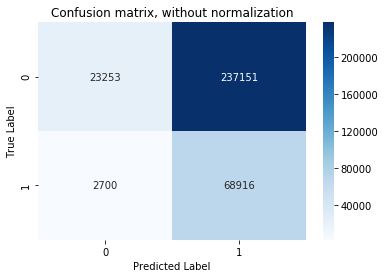

In [11]:
pred_svm = svm.predict(X_test)
conf_matrix(Y_test, pred_svm)
print(classification_report(Y_test,pred_svm))

We will draw the ROC Curve and calculate the area under the ROC Curve to show the results. It also has been compared the score in the prediction between the sample of the train and test parts.

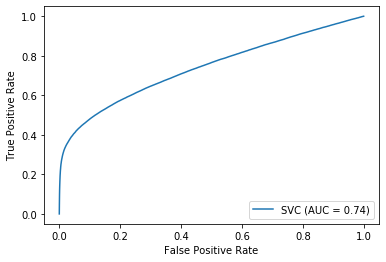

Score:  0.2776007469429552


In [12]:
show_ROC(svm)

The results for SVM are a completely disaster and show the overfitting at the model. As we can see in PCA_Modeling_BO, the accuracy obtained over the train set with the best hyperparameters is approximately 0.75 and here is below 0.30.

### Random Forest

In [13]:
random_forest = load_models('../src/Models/PCA_BO/random_forest_regression')

After that, and once the Random Forest model has been estimated, we predict and show the results through the confussion matrix.

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 218 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.1s finished
C:\Users\Beltran\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88    260404
           1       0.00      0.00      0.00     71616

    accuracy                           0.78    332020
   macro avg       0.39      0.50      0.44    332020
weighted avg       0.62      0.78      0.69    332020



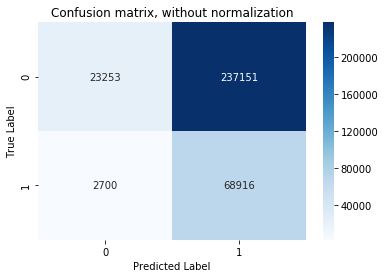

In [14]:
pred_rf = random_forest.predict(X_test)
conf_matrix(Y_test, pred_svm)
print(classification_report(Y_test,pred_rf))

Finally, we show the ROC curve and the area under the curve. Also, it has been compared the score in the prediction between the sample of the train and test parts.

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 218 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.2s finished


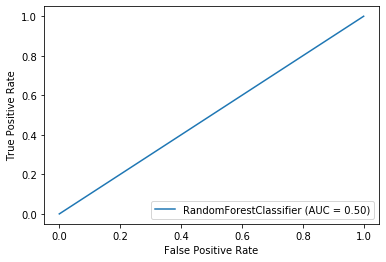

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 218 tasks      | elapsed:    0.9s


Score:  0.7843021504728631


[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.2s finished


In [15]:
show_ROC(random_forest)

Despite of the fact that the model shows a good accuracy, it completely fails on predicting defaults.

### XGBoost

In [16]:
xgb = load_models('../src/Models/PCA_BO/xgboost_regression')

Once the XGBoost model has been estimated, we predict and show the results through the confussion matrix.

              precision    recall  f1-score   support

           0       0.89      0.79      0.84    260404
           1       0.46      0.64      0.54     71616

    accuracy                           0.76    332020
   macro avg       0.68      0.72      0.69    332020
weighted avg       0.80      0.76      0.77    332020



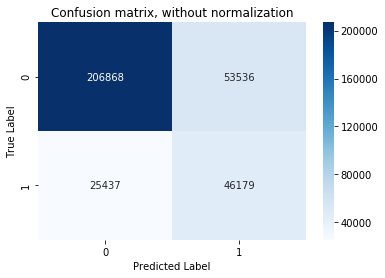

In [17]:
pred_xgb = xgb.predict(X_test)
conf_matrix(Y_test, pred_xgb)
print(classification_report(Y_test,pred_xgb))

Finally, we show the ROC curve and the area under the curve. Also, it has been compared the score in the prediction between the sample of the train and test parts.

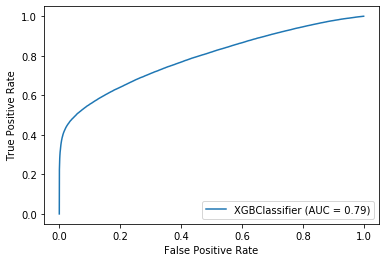

Score:  0.7621438467562195


In [18]:
show_ROC(xgb)

XGBoost obtained good results in general.

# ROC Curve comparisson

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 218 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.2s finished


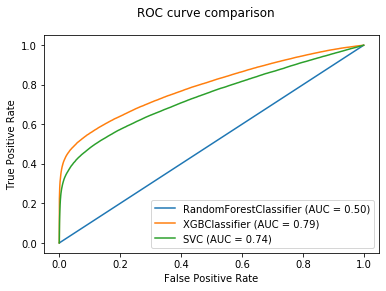

In [19]:
loan_RandomForest_disp = plot_roc_curve(random_forest, X_test, Y_test)
loan_XGBoost_disp = plot_roc_curve(xgb, X_test, Y_test, ax=loan_RandomForest_disp.ax_)
loan_SVM2_disp = plot_roc_curve(svm, X_test, Y_test, ax=loan_XGBoost_disp.ax_)
loan_RandomForest_disp.figure_.suptitle("ROC curve comparison")
plt.show()

In [20]:
print('Support Vector Machine')
print(classification_report(Y_test,pred_svm))
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(svm.score(X_test, Y_test)))
print('')
print('Random Forest')
print(classification_report(Y_test,pred_rf))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(random_forest.score(X_test, Y_test)))
print('')
print('XGBoost')
print(classification_report(Y_test,pred_xgb))
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb.score(X_test, Y_test)))
print('')

Support Vector Machine
              precision    recall  f1-score   support

           0       0.90      0.09      0.16    260404
           1       0.23      0.96      0.36     71616

    accuracy                           0.28    332020
   macro avg       0.56      0.53      0.26    332020
weighted avg       0.75      0.28      0.21    332020

Accuracy of Support Vector Machine classifier on test set: 0.28

Random Forest


C:\Users\Beltran\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88    260404
           1       0.00      0.00      0.00     71616

    accuracy                           0.78    332020
   macro avg       0.39      0.50      0.44    332020
weighted avg       0.62      0.78      0.69    332020



[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 218 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    2.1s finished


Accuracy of Random Forest classifier on test set: 0.78

XGBoost
              precision    recall  f1-score   support

           0       0.89      0.79      0.84    260404
           1       0.46      0.64      0.54     71616

    accuracy                           0.76    332020
   macro avg       0.68      0.72      0.69    332020
weighted avg       0.80      0.76      0.77    332020

Accuracy of XGBoost classifier on test set: 0.76



# Conclusions



XGBoost shows the best results for Bayesian Optimization applied over PCA, so XGBoost is going to be the model chose  in order to compare the different results obtained.

As we said in PCA_Modeling_Bo notebook, there is not specific information about what the function does with the inputs to know why the outputs show those very bad results.

# References:

- Sklearn:

    1. SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    
    2. Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    
    3. XGBoost: https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn